# 오버워치 2 점수판 분석 AI

In [1]:
import pandas as pd
from os import path
import joblib

players = 10


def prepare_scoreboards(defeat_, victory_):
    scoreboards_ = pd.concat([defeat_, victory_])
    scoreboards_.set_index(
        pd.Index((i, j) for i in range(len(scoreboards_.index) // players) for j in range(players)), inplace=True
    )
    return scoreboards_


datapath = path.join('datasets', '')
range_ = range(3, 10)
defeat = pd.read_csv(datapath + 'defeat.csv', usecols=range_)
victory = pd.read_csv(datapath + 'victory.csv', usecols=range_)
scoreboards = prepare_scoreboards(defeat, victory)
d_max = scoreboards['D'].max()
joblib.dump(d_max, 'max.joblib')
scoreboards.loc[
    (
            scoreboards['E'] == 0
    ) & (
            scoreboards['A'] == 0
    ) & (
            scoreboards['D'] == 0
    ) & (
            scoreboards['DMG'] == 0
    ) & (
            scoreboards['H'] == 0
    ) & (
            scoreboards['MIT'] == 0
    ), 'D'
] = d_max
scoreboards

E   A   D   DMG     H    MIT    GAME
0   0  24   9   5  9021     0  10517  DEFEAT
    1  17   0  11  7114     0    406  DEFEAT
    2  19   9   8  5749  1336   1266  DEFEAT
    3   7  17  11  1260  8133    237  DEFEAT
    4   9  17  10  1862  8773    113  DEFEAT
...    ..  ..  ..   ...   ...    ...     ...
599 5   8   3   5  4704   203   3185  DEFEAT
    6   8   3   5  6794     0    368  DEFEAT
    7   6   1   9  4708     0    566  DEFEAT
    8   9   6   3  4016  4736    271  DEFEAT
    9   6   3   8  3671  4507      0  DEFEAT

[6000 rows x 7 columns]

In [2]:
scoreboards.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 6000 entries, (0, 0) to (599, 9)
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   E       6000 non-null   int64 
 1   A       6000 non-null   int64 
 2   D       6000 non-null   int64 
 3   DMG     6000 non-null   int64 
 4   H       6000 non-null   int64 
 5   MIT     6000 non-null   int64 
 6   GAME    6000 non-null   object
dtypes: int64(6), object(1)
memory usage: 367.0+ KB


In [3]:
scoreboards.describe()

,E,A,D,DMG,H,MIT
count,6000.000000,6000.00000,6000.000000,6000.000000,6000.000000,6000.000000
mean,14.412167,7.43850,6.543333,6585.051500,3875.785333,2322.004833
std,9.523448,8.23518,3.776087,4416.870216,5056.284082,4496.870655
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,1.00000,4.000000,3091.750000,0.000000,0.000000
50%,13.000000,4.00000,6.000000,5934.000000,744.000000,365.000000
75%,20.000000,12.00000,9.000000,9443.000000,7465.000000,1965.500000
max,58.000000,54.00000,22.000000,27480.000000,26419.000000,41849.000000


In [4]:
import matplotlib as mpl
import os
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
IMAGES_PATH = path.join('.', 'images')
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + '.' + fig_extension)
    print('그림 저장:' + fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, dpi=resolution, format=fig_extension)

In [5]:
scoreboards

E   A   D   DMG     H    MIT    GAME
0   0  24   9   5  9021     0  10517  DEFEAT
    1  17   0  11  7114     0    406  DEFEAT
    2  19   9   8  5749  1336   1266  DEFEAT
    3   7  17  11  1260  8133    237  DEFEAT
    4   9  17  10  1862  8773    113  DEFEAT
...    ..  ..  ..   ...   ...    ...     ...
599 5   8   3   5  4704   203   3185  DEFEAT
    6   8   3   5  6794     0    368  DEFEAT
    7   6   1   9  4708     0    566  DEFEAT
    8   9   6   3  4016  4736    271  DEFEAT
    9   6   3   8  3671  4507      0  DEFEAT

[6000 rows x 7 columns]

In [6]:
tank = pd.concat([scoreboards[::players], scoreboards[5::players]])
damage = pd.concat([scoreboards[1::players], scoreboards[2::players], scoreboards[6::players], scoreboards[7::players]])
support = pd.concat(
    [scoreboards[3::players], scoreboards[4::players], scoreboards[8::players], scoreboards[9::players]]
)

In [7]:
tank.describe()

,E,A,D,DMG,H,MIT
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,18.093333,4.377500,6.444167,9541.717500,471.565833,9419.075833
std,9.885227,3.662582,3.648009,4258.007984,1237.701650,5873.979919
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,2.000000,4.000000,6540.000000,0.000000,5231.000000
50%,17.000000,3.000000,6.000000,9148.000000,0.000000,8339.500000
75%,24.000000,6.000000,9.000000,12154.000000,281.000000,12388.500000
max,58.000000,28.000000,22.000000,27480.000000,15168.000000,41849.000000


In [8]:
damage.describe()

,E,A,D,DMG,H,MIT
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000
mean,17.691250,1.958750,7.084583,8538.631250,318.110000,594.601667
std,9.212607,2.568845,4.008839,3769.132808,534.947693,1071.871745
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,0.000000,4.000000,5744.750000,0.000000,0.000000
50%,17.000000,1.000000,7.000000,8167.000000,0.000000,76.500000
75%,23.250000,3.000000,9.000000,10868.750000,463.750000,765.250000
max,55.000000,16.000000,22.000000,24353.000000,3353.000000,9682.000000


In [9]:
support.describe()

,E,A,D,DMG,H,MIT
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000
mean,9.292500,14.448750,6.051667,3153.138750,9135.570417,500.872500
std,7.023472,8.508429,3.520534,2354.229533,4091.849623,822.157638
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,8.000000,4.000000,1482.500000,6179.000000,0.000000
50%,8.000000,14.000000,6.000000,2748.500000,8689.500000,211.000000
75%,14.000000,19.000000,8.000000,4267.000000,11605.750000,651.250000
max,48.000000,54.000000,22.000000,15946.000000,26419.000000,7778.000000


그림 저장:tank_hist


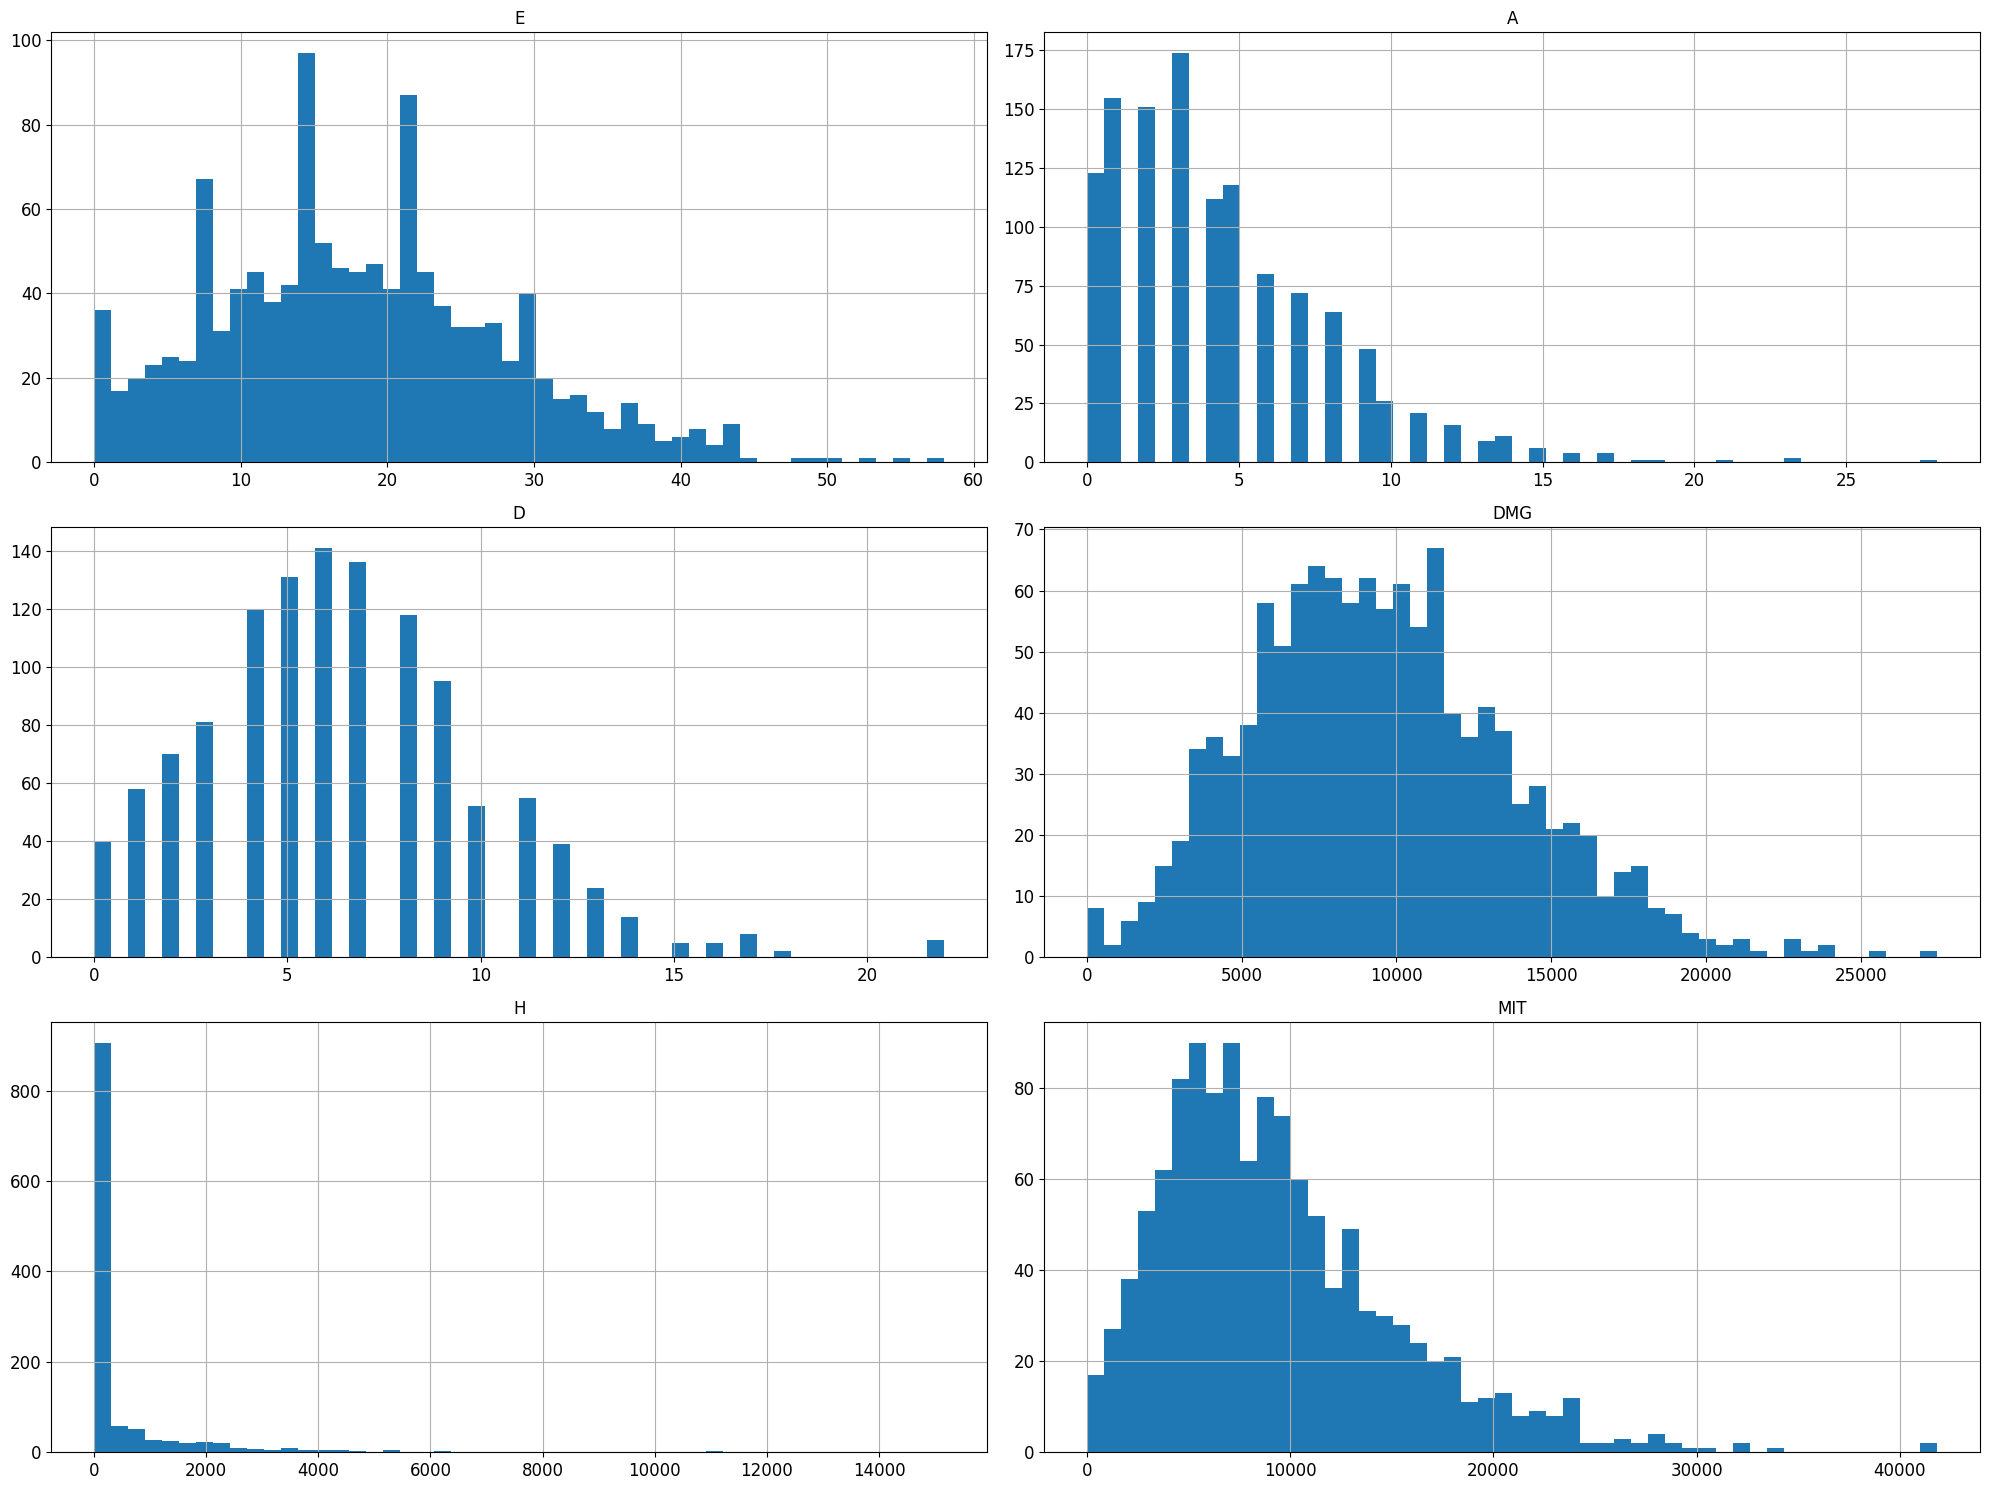

In [10]:
tank.hist(bins=50, figsize=(20, 15))
save_fig('tank_hist')
plt.show()

그림 저장:damage_hist


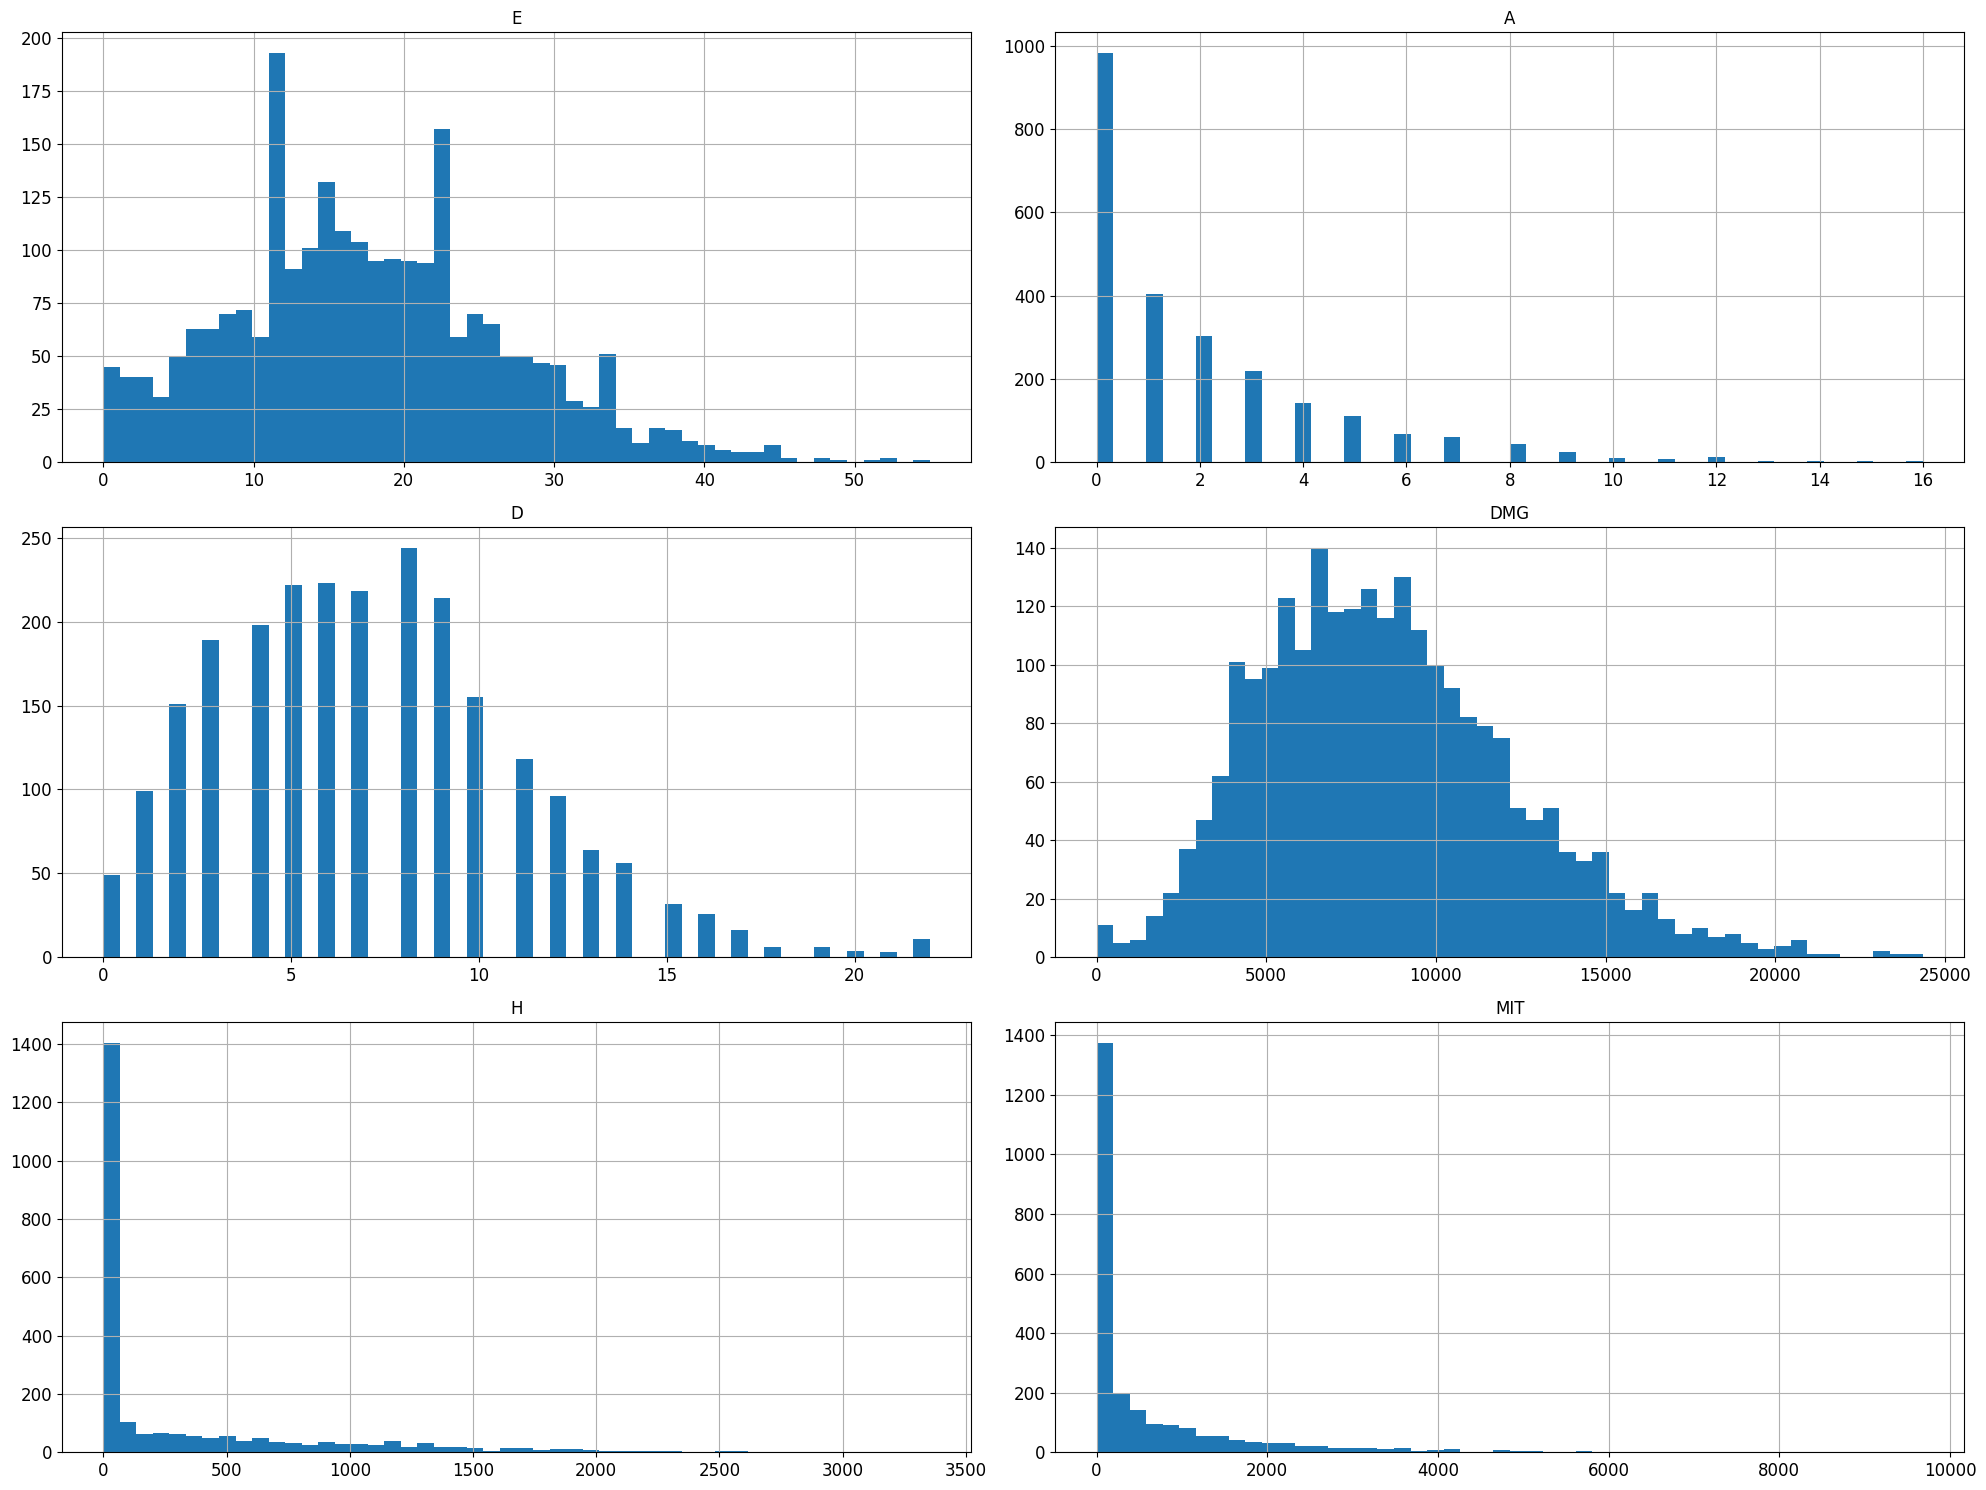

In [11]:
damage.hist(bins=50, figsize=(20, 15))
save_fig('damage_hist')
plt.show()

그림 저장:support_hist


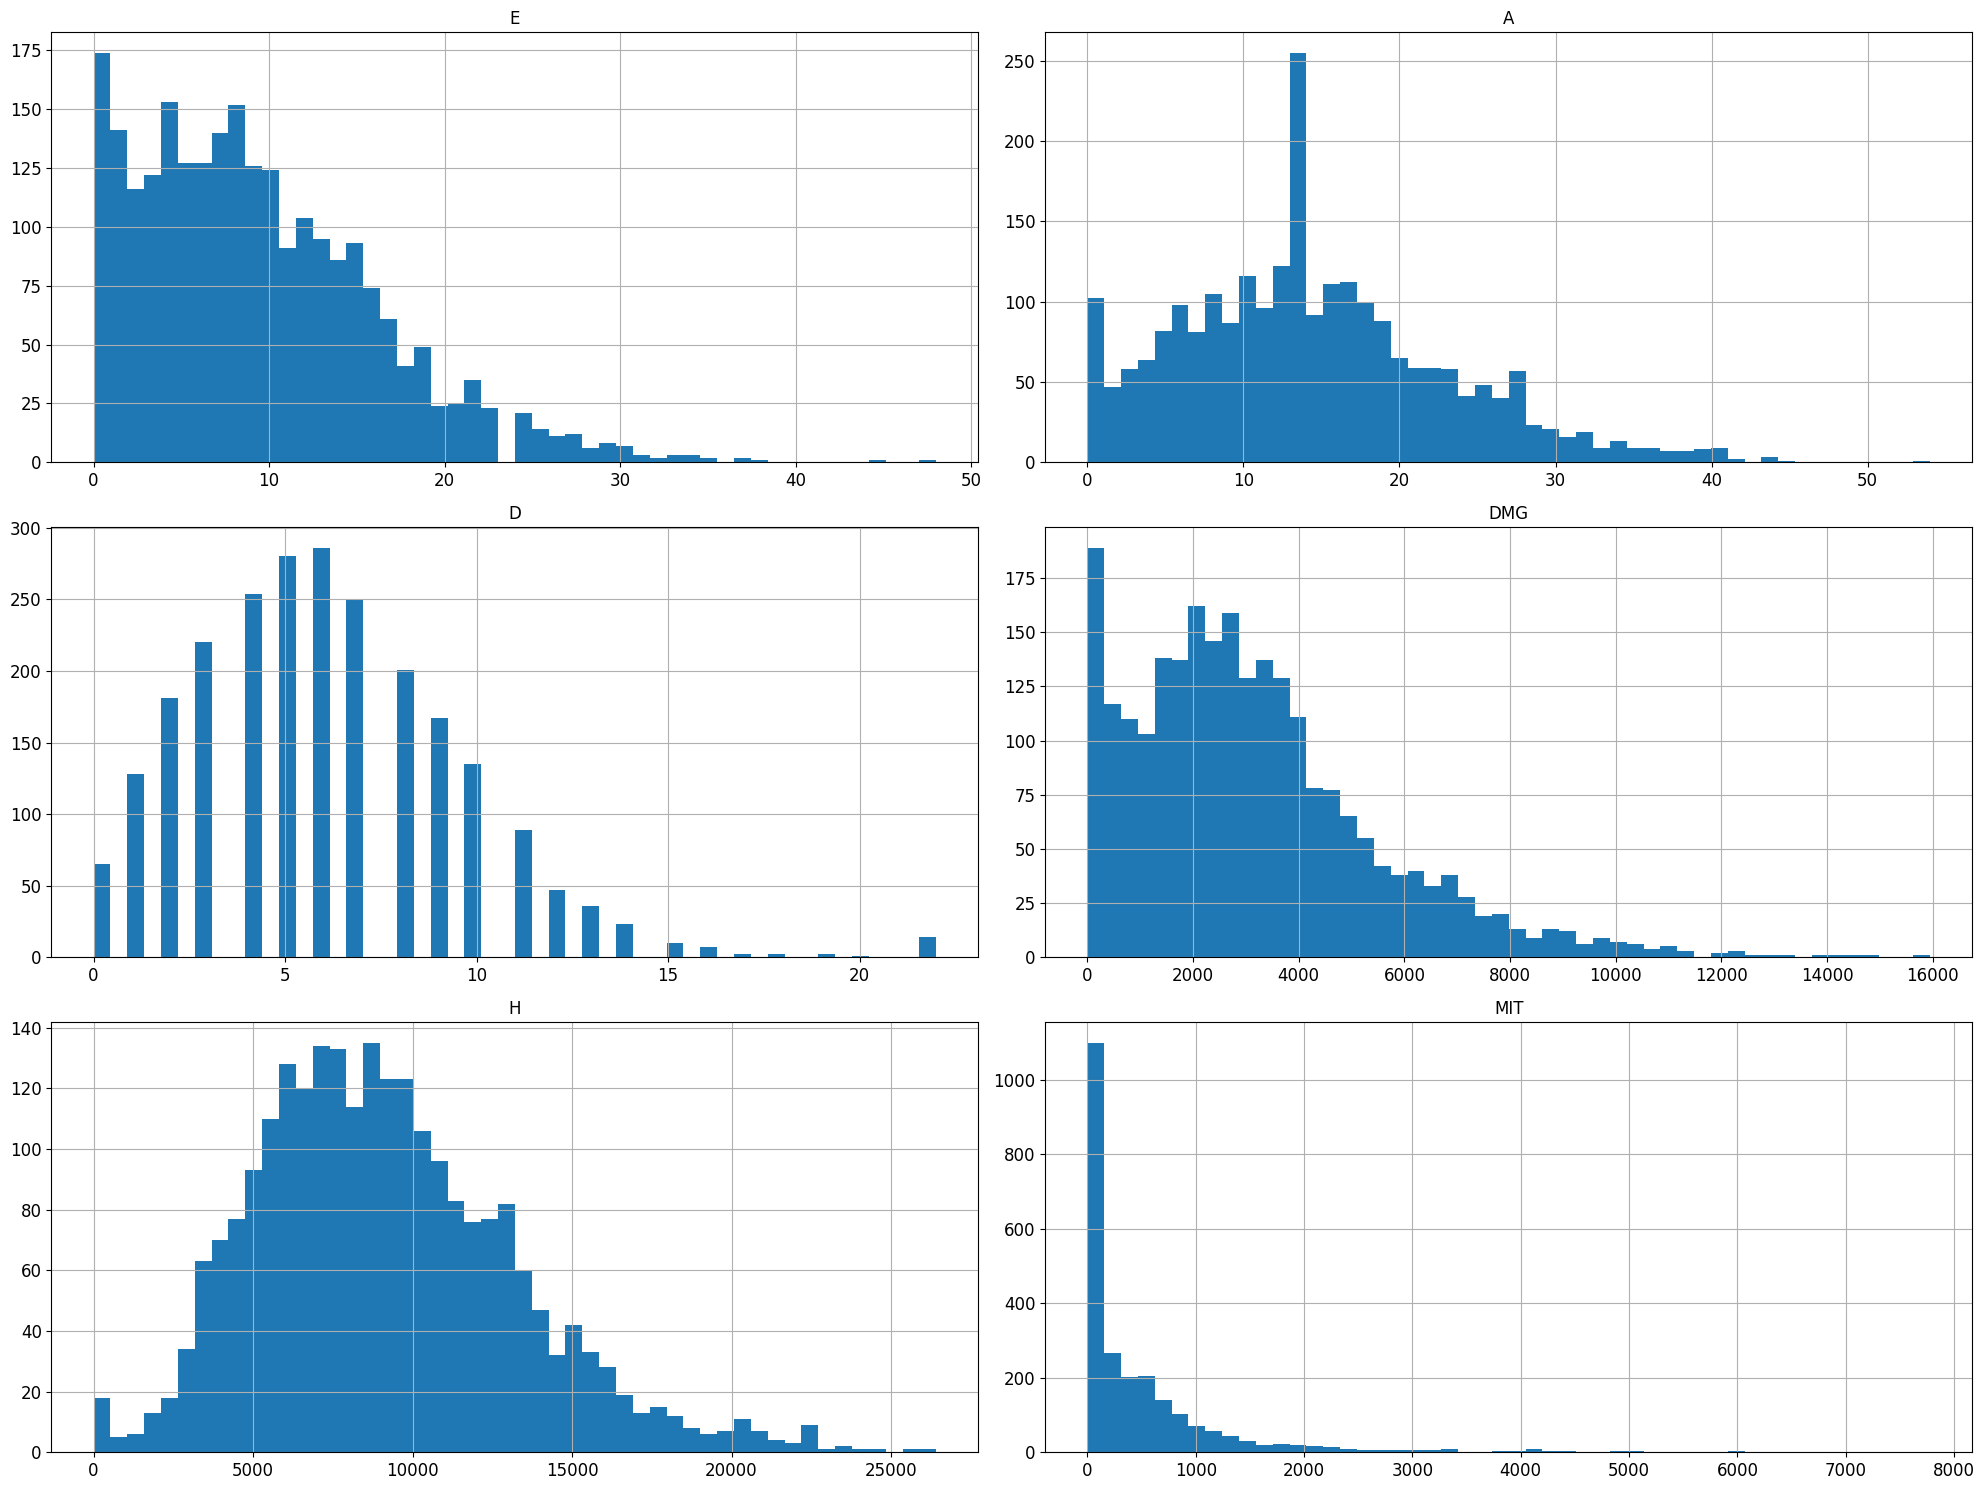

In [12]:
support.hist(bins=50, figsize=(20, 15))
save_fig('support_hist')
plt.show()

In [13]:
from sklearn import utils

scoreboards = scoreboards.loc[utils.shuffle(range(len(scoreboards.index) // players))]
scoreboards

E   A   D    DMG      H    MIT     GAME
532 0  26   2   8  14800   5388   4351  VICTORY
    1  24   0   9  11956      0    556  VICTORY
    2  19   3  11   7131      0    826  VICTORY
    3  13  21   5   4697  12149    385  VICTORY
    4  29  21   8  11112  11465      0  VICTORY
...    ..  ..  ..    ...    ...    ...      ...
145 5  29  11   4  10332      0  14135  VICTORY
    6  17   0   8   6700      0    518  VICTORY
    7  20   8   6   7941   1080   4160  VICTORY
    8   9   1   6   2206   7851      0  VICTORY
    9  13  18   4   3340  10771    544  VICTORY

[6000 rows x 7 columns]

In [14]:
X = scoreboards.drop('GAME', axis=1)
y = scoreboards['GAME'][::players].copy()

In [15]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler().fit(X)
joblib.dump(scaler, 'scaler.joblib')
X = pd.DataFrame(scaler.transform(X), X.index, X.columns)
X

E         A         D       DMG         H       MIT
532 0  0.448276  0.037037  0.363636  0.538574  0.203944  0.103969
    1  0.413793  0.000000  0.409091  0.435080  0.000000  0.013286
    2  0.327586  0.055556  0.500000  0.259498  0.000000  0.019738
    3  0.224138  0.388889  0.227273  0.170924  0.459858  0.009200
    4  0.500000  0.388889  0.363636  0.404367  0.433968  0.000000
...         ...       ...       ...       ...       ...       ...
145 5  0.500000  0.203704  0.181818  0.375983  0.000000  0.337762
    6  0.293103  0.000000  0.363636  0.243814  0.000000  0.012378
    7  0.344828  0.148148  0.272727  0.288974  0.040880  0.099405
    8  0.155172  0.018519  0.272727  0.080277  0.297172  0.000000
    9  0.224138  0.333333  0.181818  0.121543  0.407699  0.012999

[6000 rows x 6 columns]

In [16]:
features = X.shape[-1]
total_features = players * features
X = X.values.reshape(-1, total_features)
print(X.shape)
print(y.shape)

(600, 60)
(600,)


In [17]:
from sklearn import model_selection, linear_model

cv_iter = 1600
model_selection.cross_val_score(linear_model.LogisticRegressionCV(max_iter=cv_iter), X, y)

array([0.9       , 0.89166667, 0.91666667, 0.90833333, 0.91666667])

In [18]:
from sklearn import neighbors

radius = 2.
model_selection.cross_val_score(neighbors.RadiusNeighborsClassifier(radius), X, y)

array([0.725     , 0.59166667, 0.74166667, 0.69166667, 0.675     ])

In [19]:
from sklearn import neural_network

classifier_iter = 3200
model_selection.cross_val_score(neural_network.MLPClassifier(max_iter=classifier_iter), X, y)

array([0.88333333, 0.825     , 0.90833333, 0.89166667, 0.89166667])

In [20]:
from sklearn import ensemble, svm, tree
import operator

estimators = (
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(n_jobs=-1),
    ensemble.ExtraTreesClassifier(n_jobs=-1),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(n_jobs=-1),
    ensemble.HistGradientBoostingClassifier(),
    linear_model.LogisticRegression(n_jobs=-1),
    linear_model.LogisticRegressionCV(max_iter=cv_iter, n_jobs=-1),
    linear_model.PassiveAggressiveClassifier(n_jobs=-1),
    linear_model.Perceptron(n_jobs=-1),
    linear_model.RidgeClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(n_jobs=-1),
    neighbors.KNeighborsClassifier(n_jobs=-1),
    neighbors.RadiusNeighborsClassifier(radius, n_jobs=-1),
    neighbors.NearestCentroid(),
    neural_network.MLPClassifier(max_iter=classifier_iter),
    svm.LinearSVC(dual='auto'),
    svm.NuSVC(),
    svm.SVC(),
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier()
)
scores = [(estimator, model_selection.cross_val_score(estimator, X, y, n_jobs=-1).mean()) for estimator in estimators]
scores.sort(key=operator.itemgetter(1), reverse=True)
scores

[(NuSVC(), 0.9133333333333333),
 (SVC(), 0.9133333333333333),
 (LogisticRegression(n_jobs=-1), 0.9099999999999999),
 (LogisticRegressionCV(max_iter=1600, n_jobs=-1), 0.9066666666666666),
 (NearestCentroid(), 0.9066666666666666),
 (ExtraTreesClassifier(n_jobs=-1), 0.905),
 (LinearSVC(dual='auto'), 0.905),
 (RandomForestClassifier(n_jobs=-1), 0.9033333333333333),
 (RidgeClassifier(), 0.9016666666666666),
 (RidgeClassifierCV(), 0.9016666666666666),
 (KNeighborsClassifier(n_jobs=-1), 0.8983333333333332),
 (Perceptron(n_jobs=-1), 0.8933333333333333),
 (HistGradientBoostingClassifier(), 0.89),
 (GradientBoostingClassifier(), 0.885),
 (MLPClassifier(max_iter=3200), 0.8783333333333333),
 (AdaBoostClassifier(), 0.8716666666666667),
 (BaggingClassifier(n_jobs=-1), 0.8666666666666666),
 (SGDClassifier(n_jobs=-1), 0.8616666666666667),
 (PassiveAggressiveClassifier(n_jobs=-1), 0.8316666666666667),
 (DecisionTreeClassifier(), 0.7949999999999999),
 (ExtraTreeClassifier(), 0.7933333333333332),
 (Radiu

In [21]:
defeats = len(defeat) // players


def find_file(index):
    index += 1
    if index <= defeats:
        return f'DEFEAT ({index})'
    else:
        index -= len(victory) // players
        return f'VICTORY ({index})'

In [22]:
for estimator, _ in scores:
    estimator = estimator.fit(X, y)
    if hasattr(estimator, 'feature_importances_'):
        importances = estimator.feature_importances_.reshape(-1, features)
        tanks, damages, supports = [0, 5], [1, 2, 6, 7], [3, 4, 8, 9]
        importances_tank = importances[tanks].sum(0)
        importances_damage = importances[damages].sum(0)
        importances_support = importances[supports].sum(0)
        importances[tanks] = importances_tank / 2
        importances[damages] = importances_damage / 4
        importances[supports] = importances_support / 4
        joblib.dump(importances, 'importances.joblib')

        titles = '처치', '도움', '죽음', '피해', '치유', '경감'

        print('**특성 중요도**')
        for importance, title in sorted(zip(importances.sum(0), titles), reverse=True):
            print(f'{title}: {importance:.2f}')

        print('\n**1인 역할 중요도**')
        for importance, title in sorted(
                zip(
                    (importances_tank.sum(), importances_damage.sum() / 2, importances_support.sum() / 2),
                    ('돌격', '공격', '지원')
                ),
                reverse=True
        ):
            print(f'{title}: {importance:.2f}')

        print('\n**1인 돌격 특성 중요도**')
        for importance, title in sorted(zip(importances_tank, titles), reverse=True):
            print(f'{title}: {importance:.2f}')

        print('\n**1인 공격 특성 중요도**')
        for importance, title in sorted(zip(importances_damage / 2, titles), reverse=True):
            print(f'{title}: {importance:.2f}')

        print('\n**1인 지원 특성 중요도**')
        for importance, title in sorted(zip(importances_support / 2, titles), reverse=True):
            print(f'{title}: {importance:.2f}')

        break

**특성 중요도**
처치: 0.30
죽음: 0.28
도움: 0.20
피해: 0.09
경감: 0.07
치유: 0.06

**1인 역할 중요도**
돌격: 0.25
지원: 0.20
공격: 0.18

**1인 돌격 특성 중요도**
죽음: 0.09
처치: 0.07
도움: 0.04
피해: 0.02
경감: 0.01
치유: 0.01

**1인 공격 특성 중요도**
처치: 0.07
죽음: 0.04
피해: 0.02
도움: 0.02
경감: 0.01
치유: 0.01

**1인 지원 특성 중요도**
도움: 0.06
죽음: 0.05
처치: 0.04
피해: 0.02
치유: 0.01
경감: 0.01


In [23]:
defeats = defeat.index.stop
for i in range(defeats - 10, defeats - 101, -players):
    defeat_i = defeat[i:i + players]
    print(f'DEFEAT ({i // players + 1})')
    print(defeat_i)
    contributions = scaler.transform(defeat_i.drop(['GAME'], axis=1))
    contributions[:, 2] = 1 - contributions[:, 2]
    contributions *= importances
    contributions = contributions.sum(1)
    contributions[tanks] *= 2 / contributions[tanks].sum()
    contributions[damages] *= 4 / contributions[damages].sum()
    contributions[supports] *= 4 / contributions[supports].sum()
    print(f'TEAM 1:', end='')
    for contribution in contributions[:5]:
        print(f' {contribution:.2f}', end='')
    print(f'\nTEAM 2:', end='')
    for contribution in contributions[5:]:
        print(f' {contribution:.2f}', end='')
    print('\n')

DEFEAT (300)
       E   A   D    DMG     H    MIT     GAME
2990  11   0   5   9188   134  10874   DEFEAT
2991  13   0   1   6973     0      0   DEFEAT
2992  11   2  12   7421  1667    696   DEFEAT
2993   6   8   5   2250  9554   1372   DEFEAT
2994   6   7   8   2693  6873    622   DEFEAT
2995  23   1   5  12432     0  13761  VICTORY
2996  13   0   3   6413     0      0  VICTORY
2997  13   0   9   7753   617    546  VICTORY
2998   8  22   2   4947  9614      0  VICTORY
2999  11   8   3   5329  5855    667  VICTORY
TEAM 1: 0.90 1.20 0.77 0.91 0.76
TEAM 2: 1.10 1.12 0.91 1.30 1.03

DEFEAT (299)
       E   A   D    DMG     H   MIT     GAME
2980   9   0   8   8605  1745  6245   DEFEAT
2981   5   0  10   8730   968     0   DEFEAT
2982  11   3   8   8945     0     0   DEFEAT
2983   5   6   4   3525  5237   302   DEFEAT
2984   0   9   5    972  8236     0   DEFEAT
2985  21   5   2   8762  4458  8241  VICTORY
2986  20   3   5  10438     0   543  VICTORY
2987  13   1   5   8366     0   430  VICT

In [24]:
victorys = victory.index.stop
for i in range(victorys - 10, victorys - 101, -players):
    victory_i = victory[i:i + players]
    print(f'VICTORY ({i // players + 1})')
    print(victory_i)
    contributions = scaler.transform(victory_i.drop(['GAME'], axis=1))
    contributions[:, 2] = 1 - contributions[:, 2]
    contributions *= importances
    contributions = contributions.sum(1)
    contributions[tanks] *= 2 / contributions[tanks].sum()
    contributions[damages] *= 4 / contributions[damages].sum()
    contributions[supports] *= 4 / contributions[supports].sum()
    print(f'TEAM 1:', end='')
    for contribution in contributions[:5]:
        print(f' {contribution:.2f}', end='')
    print(f'\nTEAM 2:', end='')
    for contribution in contributions[5:]:
        print(f' {contribution:.2f}', end='')
    print('\n')

VICTORY (300)
       E   A  D   DMG     H   MIT     GAME
2990  13   5  1  4903   350  2878  VICTORY
2991  18   0  5  9020   947     0  VICTORY
2992  19   2  6  6396   120   540  VICTORY
2993  10  16  3  1538  7243   466  VICTORY
2994   7  11  2  1311  6884   464  VICTORY
2995   8   3  5  4704   203  3185   DEFEAT
2996   8   3  5  6794     0   368   DEFEAT
2997   6   1  9  4708     0   566   DEFEAT
2998   9   6  3  4016  4736   271   DEFEAT
2999   6   3  8  3671  4507     0   DEFEAT
TEAM 1: 1.12 1.20 1.16 1.19 1.10
TEAM 2: 0.88 0.94 0.70 1.00 0.71

VICTORY (299)
       E   A   D    DMG      H    MIT     GAME
2980  19   0   8  11883    335   6134  VICTORY
2981  14   2   7   9144      0    654  VICTORY
2982  15   2  13   7942    537    949  VICTORY
2983  10  17   2   3683   7974    213  VICTORY
2984  13  13   4   5989   5654    360  VICTORY
2985  24   4   6  12719      0  14506   DEFEAT
2986  11   1   8   6786    644   3383   DEFEAT
2987  25   5   8   8714      0    431   DEFEAT
2988   8 

In [25]:
from tensorflow.keras import backend, layers
from tensorflow import keras

backend.clear_session()
model = keras.Sequential()
model.add(layers.Dense(300, 'relu', input_shape=(total_features,)))
model.add(layers.Dense(100, 'relu'))
model.add(layers.Dense(1, 'sigmoid'))
model.summary()

2024-04-22 04:43:58.524956: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-22 04:44:02.295947: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-22 04:44:02.551283: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-22 04:44:02.551553: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been bu

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               18300     
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 48501 (189.46 KB)
Trainable params: 48501 (189.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
from tensorflow.keras import optimizers, callbacks

model.compile('sgd', 'binary_crossentropy', ['accuracy'])
transform = preprocessing.LabelEncoder().fit_transform(y)
stopping = callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(
    X,
    transform,
    epochs=256,
    callbacks=[stopping],
    validation_split=.25
)
history.history['val_loss'][-11], history.history['val_accuracy'][-11]

Epoch 1/256


2024-04-22 04:44:04.867380: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-04-22 04:44:05.159948: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f4dc8fc5fb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-22 04:44:05.160022: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2024-04-22 04:44:05.328117: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8907
2024-04-22 04:44:05.592436: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-22 04:44:05.781466: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


15/15 [==============================] - 2s 15ms/step - loss: 0.6724 - accuracy: 0.5022 - val_loss: 0.6674 - val_accuracy: 0.5867
Epoch 2/256
15/15 [==============================] - 0s 6ms/step - loss: 0.6659 - accuracy: 0.6422 - val_loss: 0.6621 - val_accuracy: 0.6333
Epoch 3/256
15/15 [==============================] - 0s 7ms/step - loss: 0.6605 - accuracy: 0.6622 - val_loss: 0.6573 - val_accuracy: 0.7467
Epoch 4/256
15/15 [==============================] - 0s 7ms/step - loss: 0.6548 - accuracy: 0.7311 - val_loss: 0.6522 - val_accuracy: 0.7933
Epoch 5/256
15/15 [==============================] - 0s 7ms/step - loss: 0.6489 - accuracy: 0.8133 - val_loss: 0.6479 - val_accuracy: 0.8400
Epoch 6/256
15/15 [==============================] - 0s 6ms/step - loss: 0.6438 - accuracy: 0.8711 - val_loss: 0.6434 - val_accuracy: 0.8800
Epoch 7/256
15/15 [==============================] - 0s 7ms/step - loss: 0.6378 - accuracy: 0.8978 - val_loss: 0.6381 - val_accuracy: 0.8733
Epoch 8/256
15/15 [=====

(0.24681518971920013, 0.9399999976158142)